# Credit Card **Fraud Detection**

* In this project we analyze a dataset of credit card transactions made over a two-day period in September 2013 by European cardholders. 

* The dataset contains 284,807 transactions, of which 492 (0.17%) are fraudulent.

* Each transaction has 30 features, all of which are numerical. 

* The features V1, V2, ..., V28 are the result of a PCA transformation. 

* To protect confidentiality, background information on these features is not available.

* The `Time` feature contains the time elapsed since the first transaction

* The `Amount` feature contains the transaction amount.

* The response variable, Class, is 1 in the case of fraud, and 0 otherwise.

* Our goal in this project is to construct models to predict whether a credit card transaction is fraudulent.

* We'll attempt a supervised learning approach.

* We'll also create visualizations to help us understand the structure of the data and unearth any interesting patterns.

# Import basic libraries:

In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas options
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None,\
              'display.max_columns', None)

# Plotting options
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Read in the data into a pandas dataframe.

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = "https://drive.google.com/open?id=1ziqYUqz8T6gOmknqxiq23nVyBLCGYcuv" 

fluff, id = link.split('=')

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('dataset_creditcard.csv')  
transactions = pd.read_csv('dataset_creditcard.csv')


* Check basic metadata.

In [ ]:
print(transactions.shape)
print(transactions.info())


(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 2

* Are there any variables with missing data?

In [ ]:
print('Check Missing Data')
print(transactions.isnull().sum().sum())
print(transactions.isnull().any().any())


Check Missing Data
0
False


* Let's view first two transactions.

In [ ]:
transactions.head(2)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


* Let's view 10 randomly chosen transactions.

In [ ]:
transactions.sample(10)  # view randomly chosen transactions


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
111263,72164.0,-1.211814,1.359575,0.105069,0.101872,-1.130651,-0.605406,0.417278,0.573092,-0.887772,-0.392484,1.180100,1.121883,0.352868,0.871220,-0.118534,0.450884,-0.279787,0.271235,0.086036,-0.443497,0.253058,0.464572,0.070058,0.582629,-0.292144,0.230488,-0.532420,-0.203019,109.31,0
93357,64372.0,-0.271456,0.718469,1.078837,0.302257,0.253494,-1.321145,0.879938,-0.213773,-0.405033,-0.488764,-0.317826,0.295192,0.222507,0.199196,0.133896,0.112166,-0.625529,-0.204252,-1.116874,-0.115232,0.212667,0.541562,0.046340,0.713978,-0.358296,-0.620994,0.099862,0.110222,25.24,0
155768,106336.0,2.013157,0.200585,-1.471456,0.541852,0.473794,-0.531379,-0.034647,-0.143915,1.536715,-0.582683,2.253291,-1.702480,1.378069,0.844305,-1.175707,0.382669,1.088086,0.339279,0.001364,-0.212968,-0.448051,-0.978950,0.370196,0.543604,-0.357272,0.110324,-0.091230,-0.046198,1.98,0
138963,82941.0,-0.742823,0.689397,1.819907,1.512693,-0.583992,1.318967,-0.494765,1.019631,0.312710,-0.621335,-0.154498,0.701883,-1.446405,-0.027573,-1.985738,-1.164568,1.008814,-0.258374,1.713843,-0.181106,-0.239316,-0.426760,0.022856,-0.328303,-0.390268,-0.428906,0.098334,0.077329,17.89,0
63315,50658.0,0.060186,0.754964,1.928160,2.882703,-0.157126,1.395132,-0.349524,0.514218,-0.672094,0.810265,0.547682,0.443039,-0.049771,-0.137928,-0.182502,-0.106906,0.039975,0.358695,0.891186,0.037921,0.176309,0.739265,0.181292,-0.296193,-1.576138,0.000475,0.339314,0.257105,9.62,0
243275,151865.0,-2.996174,-1.821222,1.086025,-2.513846,-2.363527,-0.400251,-1.063377,0.905834,-1.686673,0.306464,-1.506048,-1.116136,0.646863,-0.351975,0.570761,0.980874,0.012094,1.029488,-1.349050,-0.025625,0.124118,0.318693,-0.438265,-0.093139,0.423699,-0.059249,0.406321,-0.308079,272.65,0
41027,40505.0,-1.344188,0.332620,1.560509,1.125061,0.588972,1.254752,0.980211,0.476749,-0.998201,-0.395656,0.932225,0.339549,-0.147230,0.569007,2.335108,-1.680111,1.321536,-2.378395,-0.699337,0.566004,-0.183992,-0.762230,0.627169,-0.727996,-0.168364,-0.535898,0.316464,0.157295,189.40,0
116828,74444.0,-1.559625,1.483498,2.742972,3.129732,-1.510561,1.812295,-1.542531,1.583351,-0.178795,0.339203,-0.336027,1.450767,0.971571,-0.758320,-1.949362,-0.177809,0.653546,0.831442,1.647329,0.250552,0.169856,0.931820,-0.323302,0.101174,0.376820,0.561976,0.282096,0.090435,0.00,0
215719,140189.0,2.076698,-1.383669,-1.952099,-1.873136,1.269575,3.678885,-1.579294,0.943834,-0.034977,0.738836,-0.046592,-0.424709,0.133297,-0.294835,0.586974,1.077221,0.047432,-1.276173,0.305900,0.126818,0.344382,0.884022,0.141137,0.743452,-0.124536,-0.071273,0.023133,-0.047700,49.99,0
212091,138709.0,2.105729,-0.063013,-1.323741,0.270153,0.163858,-0.857060,0.175729,-0.298669,0.575067,0.072375,-1.286421,0.265303,0.232320,0.226371,0.078918,0.073148,-0.517226,-0.674282,0.379727,-0.200099,-0.329303,-0.808684,0.262571,-0.582957,-0.213560,0.234227,-0.071193,-0.066075,1.98,0


* How balanced are the classes, i.e. how common are fraudulent transactions?

In [ ]:
print('Check Imbalanced Data')
print(transactions['Class'].value_counts())
print(transactions['Class'].value_counts(normalize=True))


Check Imbalanced Data
0    284315
1       492
Name: Class, dtype: int64
0    0.998273
1    0.001727
Name: Class, dtype: float64


* About 0.17% (492 out of 284,807) transactions are fraudulent.

# Train/Test Split

* Before we begin preprocessing, we split off a test data set.

* First split the data into features and response (class / label) variables.

In [ ]:
X = transactions.drop(labels='Class', axis=1) # Features
y = transactions.loc[:, 'Class']              # Response
del transactions                              # Delete the original data


* We'll use a test size of 20%.

* We also **stratify** the split on the response variable, which is very important to do because there are so few fraudulent transactions.

* $y$ is a binary categorical variable with values 0 and 1 and, for instance, there are 25% of zeros and 75% of ones, 
   * $stratify=y$ will make sure that your random split has 25% of 0's and 75% of 1's. 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, \
                                                    random_state=9999, shuffle=True, stratify=y)


In [ ]:
print(type(X), type(y), type(X_train), type(y_train))
del X, y
print("Train shape: ", X_train.shape, y_train.shape, "\t Test shape: ", X_test.shape, y_test.shape)


<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
Train shape:  (227845, 30) (227845,) 	 Test shape:  (56962, 30) (56962,)


* Double check if our split is correct

In [ ]:
print(y_train.value_counts())
print(y_train.value_counts(normalize=True))
print(y_test.value_counts())
print(y_test.value_counts(normalize=True))


0    227451
1       394
Name: Class, dtype: int64
0    0.998271
1    0.001729
Name: Class, dtype: float64
0    56864
1       98
Name: Class, dtype: int64
0    0.99828
1    0.00172
Name: Class, dtype: float64


In [ ]:
# Prevent view warnings
X_train.is_copy = False
X_test.is_copy = False


# Exploratory Data Analysis

## Time

* Few descriptive statistics for the `Time` variable:

In [ ]:
X_train['Time'].describe()


count    227845.000000
mean      94820.489605
std       47499.529867
min           0.000000
25%       54149.000000
50%       84718.000000
75%      139340.000000
max      172792.000000
Name: Time, dtype: float64

* Convert the time from seconds to hours to ease the interpretation.

* We must use `.loc` to change the values of `X_train` and `X_test`

In [ ]:
X_train.loc[:,'Time'] = X_train.Time / 3600
X_test.loc[:,'Time'] = X_test.Time / 3600


* _Remark:_ Another way to access (take /view) values of `Dataframe`

In [ ]:
X_test.Time[5:11]


238597    41.593611
28709      9.756667
49216     12.210833
96540     18.282778
80341     16.233889
100396    18.750000
Name: Time, dtype: float64

* What is the time of the last transaction, in days?

In [ ]:
X_train['Time'].max() / 24


1.9999074074074075

* So the transactions indeed occur over a two-day period.

* Next let's plot a histogram of transaction times, with one bin per hour.

* There are two lulls in credit card transactions during nighttime on each day.

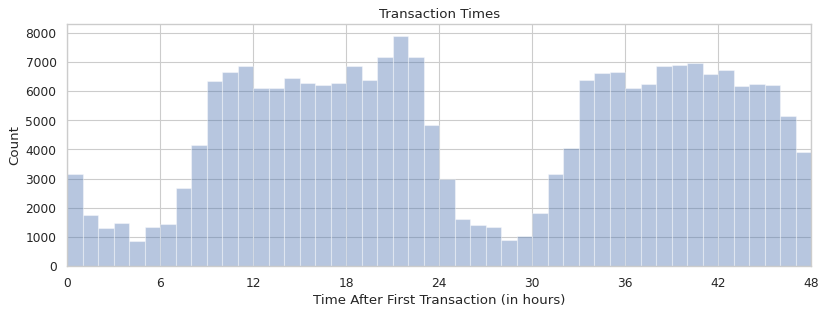

In [ ]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(X_train['Time'], bins=48, kde=False)
plt.xlim([0,48])
plt.xticks(np.arange(0,54,6))  # tick on (horizontal) x-axis every 6 steps
plt.xlabel('Time After First Transaction (in hours)')
plt.ylabel('Count')
plt.title('Transaction Times')
plt.show()  # show figures in case we use python scripts. Here's not important. 


## Amount

* Summary statistics:

In [ ]:
print(X_train['Amount'].describe())


count    227845.000000
mean         88.230169
std         246.928275
min           0.000000
25%           5.530000
50%          22.000000
75%          77.200000
max       25691.160000
Name: Amount, dtype: float64


* The amounts are very right-skewed. 

* To verify this, plot a histogram of the transaction amounts:


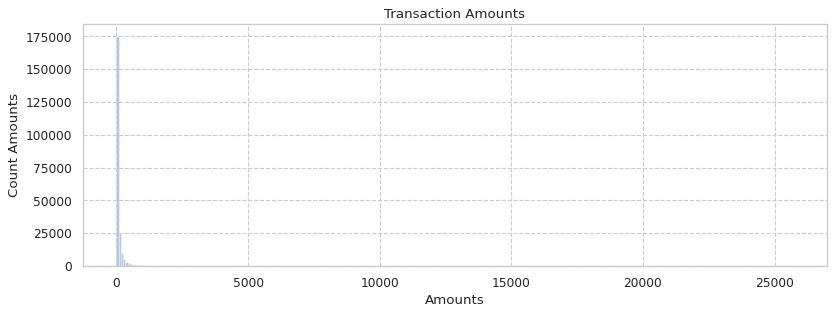

In [ ]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(X_train['Amount'], bins=300, kde=False)
plt.grid(linestyle='--')
plt.xlabel('Amounts')
plt.ylabel('Count Amounts')
plt.title('Transaction Amounts')
plt.show()


* We can calculate the skewness:

  * Big value shows the strength of skewness of the `Amount` variable .

  * We expect some value closes to 0.


In [ ]:
print(X_train['Amount'].skew())


16.86120294562422


* The histogram is hard to read due to some outliers we can't see.

* A boxplot will show the outliers.

* We can see there are no outliers on the left and many outliers on the right.

Text(0.5, 1.0, 'Transaction Amounts')

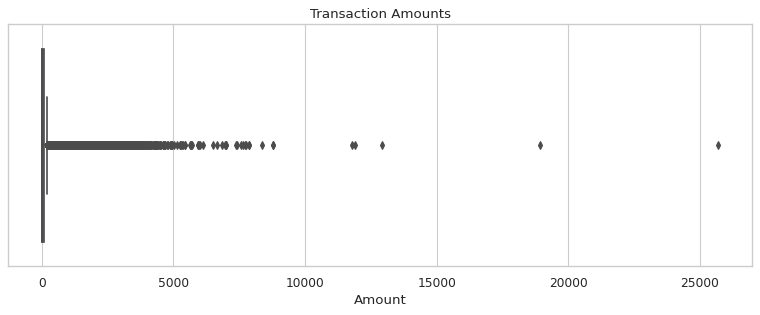

In [ ]:
plt.figure(figsize=(12,4), dpi=80)
sns.boxplot(X_train['Amount'])
plt.title('Transaction Amounts')
plt.show()


* That's a strong right skew. Let's use a power transform to bring the transaction amounts closer to a normal distribution.

* We'll use the [Box-Cox transform in SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html)

* **boxcox** requires the input data to be positive but some of the amounts are zero (min = 0 above), so we need to shift the amounts first to make them positive. We'll shift by a very small amount, just $10^{-20}$.

In [ ]:
X_train.loc[:,'Amount'] = X_train['Amount'] + 1e-20 # Shift all amounts by 1e-20


* Perform the Box-Cox transform:

In [ ]:
X_train.loc[:,'Amount'], maxlog, (min_ci, max_ci) = sp.stats.boxcox(X_train['Amount'], lmbda=None, alpha=0.01)


* The maximum likelihood estimate of $\lambda$ in the Box-Cox transform

* Use of `f-string` of Python for the sake of printing simplicity

In [ ]:
print(maxlog)
print(f"The 99% confidence interval for 𝜆 is: ({min_ci} ; {max_ci})")


0.13240593317069416
The 99% confidence interval for 𝜆 is: (0.13118034263329517 ; 0.13364173928172668)


* Plot the newly transformed amounts:

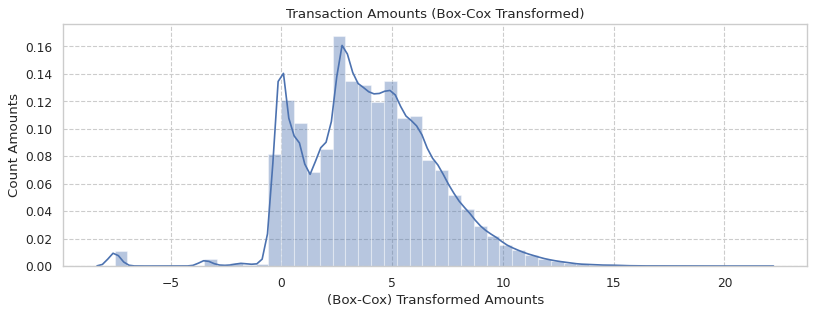

In [ ]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(X_train['Amount'], kde=True)
plt.grid(linestyle='--')
plt.xlabel('(Box-Cox) Transformed Amounts')
plt.ylabel('Count Amounts')
plt.title('Transaction Amounts (Box-Cox Transformed)')
plt.show()


* The distribution appears to be bimodal, suggesting a divide between "small" and "large" purchases.

* Now let's check the descriptive stats of the transformed amounts:

In [ ]:
print(X_train['Amount'].describe())


count    227845.000000
mean          3.959524
std           2.962197
min          -7.535550
25%           1.919296
50%           3.819480
75%           5.875869
max          21.419175
Name: Amount, dtype: float64


* What's the skewness of the transformed amounts? (Zero skewness would be ideal.)

In [ ]:
print(X_train['Amount'].skew())


0.0558883122152773


* So our power transform removed most of the skewness in the `Amount` variable.

* Now we need to compute the Box-Cox transform on the test data amounts as well, using the $\lambda$ value estimated on the training data.

* Roughly speaking, **we have to do the in the same manner for training and testing sets**.

In [ ]:
X_test.loc[:,'Amount'] = X_test['Amount'] + 1e-20  # Shift all amounts by 1e-20

X_test.loc[:,'Amount'] = sp.stats.boxcox(X_test['Amount'], lmbda=maxlog)


# Time vs. Amount

* Is there a relationship between the transaction amounts and the time of day?

* Let's explore this question with a **joint histogram** using hexagonal bins. 

* For this plot, we convert each transaction time to the hour of the day on which it occurred.

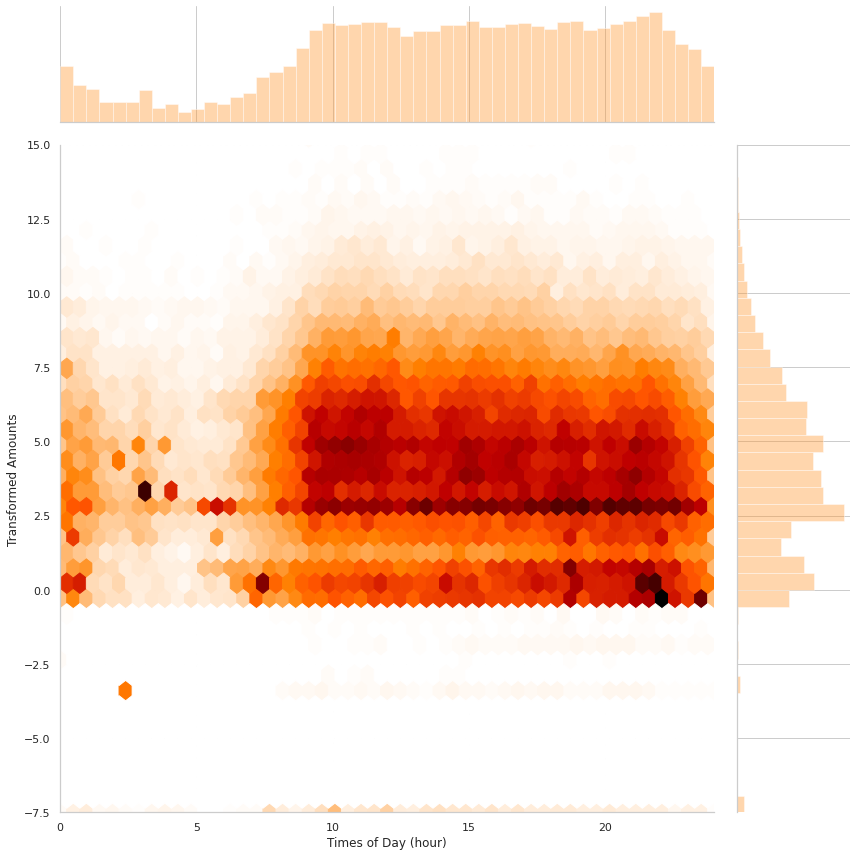

In [ ]:
cmap = plt.cm.gist_heat_r
sns.jointplot(X_train['Time'].apply(lambda x: x % 24), X_train['Amount'], color=cmap(.2), cmap=cmap, \
              kind='hex', stat_func=None, height=12, xlim=(0,24), ylim=(-7.5,15)) \
             .set_axis_labels('Times of Day (hour)', 'Transformed Amounts')
plt.show()


* The transaction amounts appear to be similarly distributed throughout the daytime hours.

* However, in the earliest hours of the day, around 5-7AM, small amounts around 2.5 are the most common (recall this is a Box-Cox transformed value).

## V1-V28

* Let's compare the descriptive stats of the PCA variables `V1-V28`.

In [ ]:
pca_vars = ['V%i' % k for k in range(1,29)]
print(pca_vars)


['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']


* Full table of descriptive stats:

In [ ]:
X_train[pca_vars].describe()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,-0.000202,-0.001036,0.001273,-0.002294,0.000737,-0.001679,0.000637,0.000001,0.001522,-0.000329,0.000479,0.000324,0.000744,-0.001530,0.000421,0.001504,-0.000396,0.001166,0.000486,0.000471,0.000157,0.001193,-0.000327,-0.000371,-0.000379,0.000531,0.000797,-0.000158
std,1.958604,1.651585,1.515004,1.414247,1.377860,1.332600,1.230361,1.186654,1.097982,1.086625,1.020475,0.997406,0.996062,0.958597,0.914790,0.875782,0.847202,0.838002,0.813823,0.770306,0.730954,0.725404,0.625597,0.604891,0.521049,0.482226,0.405178,0.336469
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-37.060311,-73.216718,-11.126624,-23.228255,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-13.563273,-25.162799,-9.498746,-6.938297,-54.497720,-34.830382,-9.499423,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084
25%,-0.921423,-0.600501,-0.890357,-0.849518,-0.692827,-0.768220,-0.554115,-0.209057,-0.641844,-0.536109,-0.762036,-0.404717,-0.648138,-0.425702,-0.582648,-0.467557,-0.484880,-0.498393,-0.455349,-0.211484,-0.228182,-0.541265,-0.162065,-0.354662,-0.317444,-0.326688,-0.070822,-0.052938
50%,0.016062,0.063794,0.181092,-0.024155,-0.054905,-0.275030,0.039144,0.022335,-0.051045,-0.093951,-0.030683,0.141306,-0.013847,0.049504,0.047965,0.066954,-0.066768,-0.002147,0.005276,-0.061899,-0.029111,0.007694,-0.011540,0.040879,0.016099,-0.052181,0.001492,0.011223
75%,1.315803,0.803697,1.028136,0.740101,0.610645,0.398376,0.570539,0.326594,0.597551,0.452342,0.739740,0.617363,0.663488,0.491457,0.647479,0.524575,0.397802,0.502199,0.459708,0.133296,0.187120,0.530952,0.147271,0.438593,0.350529,0.241384,0.091837,0.078519
max,2.454930,19.167239,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.207059,4.712398,5.591971,38.117209,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808


* It's awful to interpret this table, so let's make some visualizations.

* **Solution: data visualization**

* We'll start by plotting the means:

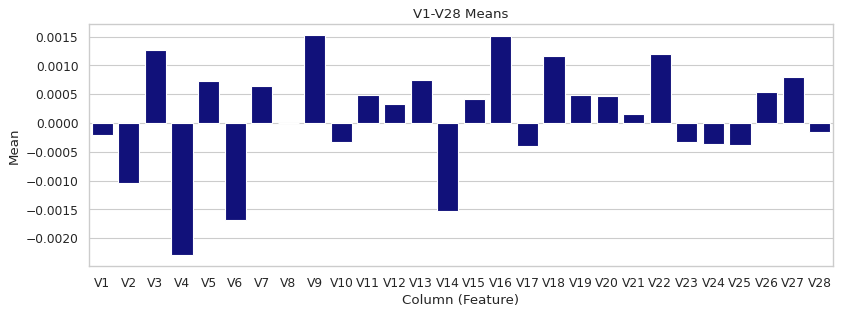

In [ ]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=X_train[pca_vars].mean(), color='darkblue')
plt.xlabel('Column (Feature)')
plt.ylabel('Mean')
plt.title('V1-V28 Means')
plt.show()


* All of `V1-V28` have approximately zero mean.

* Now plot the standard deviations:

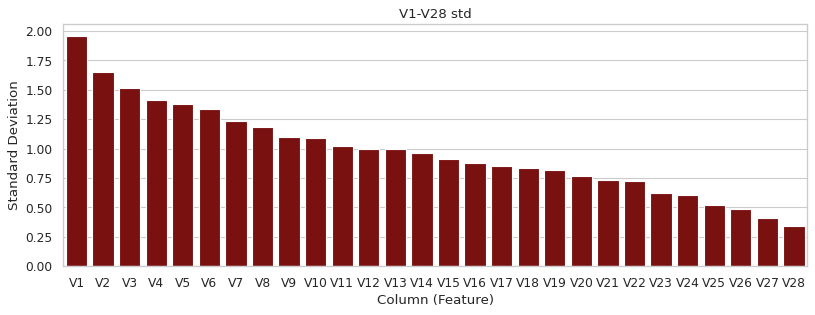

In [ ]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=X_train[pca_vars].std(), color='darkred')
plt.xlabel('Column (Feature)')
plt.ylabel('Standard Deviation')
plt.title('V1-V28 std')
plt.show()


* The PCA variables have roughly unit variance, but as low as ~0.3 and as high as ~1.9.

* Plot the skewnesses next:

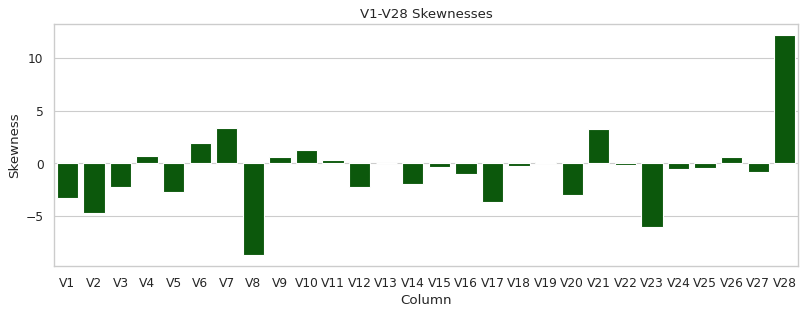

In [ ]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=X_train[pca_vars].skew(), color='darkgreen')
plt.xlabel('Column')
plt.ylabel('Skewness')
plt.title('V1-V28 Skewnesses')
plt.show()


* A few of the PCA variables are significantly skewed.

* Let's plot a histogram of one of the particularly skewed variables, `V8`, to see the distribution in detail.

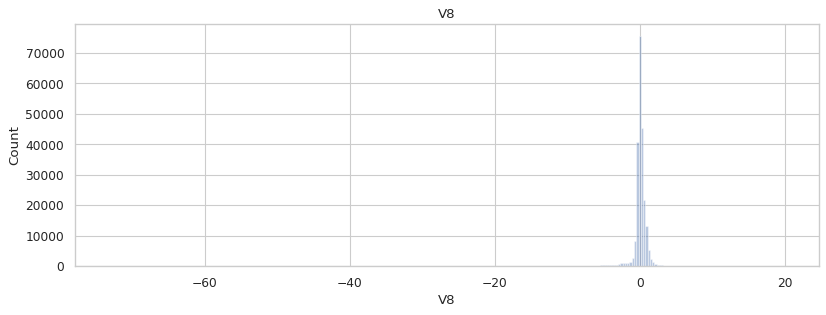

In [ ]:
plt.figure(figsize=(12,4), dpi=80)
sns.distplot(X_train['V8'], bins=300, kde=False)
plt.ylabel('Count')
plt.title('V8')
plt.show()


In [ ]:
X_train.V8.describe()


count    227845.000000
mean          0.000001
std           1.186654
min         -73.216718
25%          -0.209057
50%           0.022335
75%           0.326594
max          20.007208
Name: V8, dtype: float64

* The histogram doesn't show us outliers.

* Let's try a boxplot:

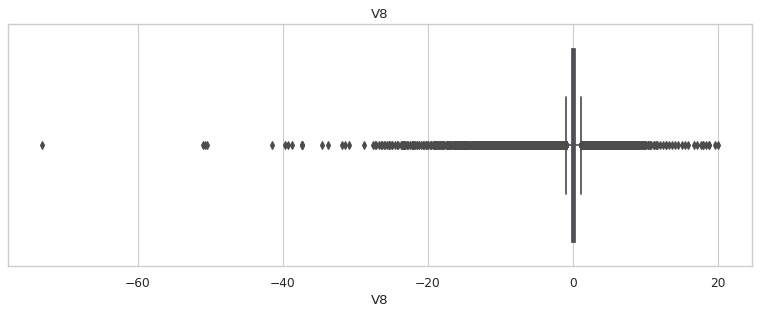

In [ ]:
plt.figure(figsize=(12,4), dpi=80)
sns.boxplot(X_train['V8'])
plt.title('V8')
plt.show()


* The boxplot is also hard to read due to the large number of outliers, which indicates high kurtosis in `V8`.

* This motivates us to plot the kurtoses of the PCA variables. 

* The kurtosis method employed in pandas is Fisher’s definition, for which the standard normal distribution has kurtosis 0.

* ***Note:*** we use the log scale on the y-axis in the plot below:

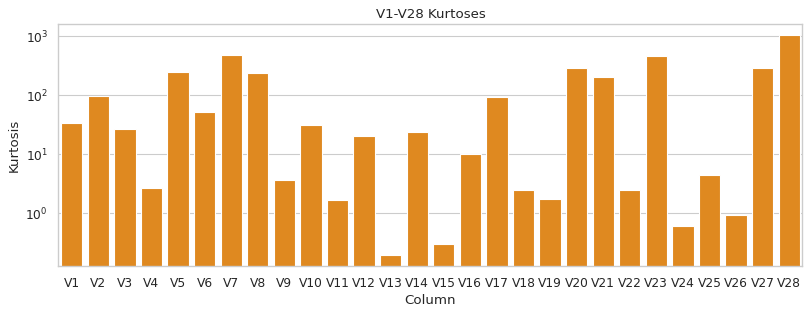

In [ ]:
plt.figure(figsize=(12,4), dpi=80)
plt.yscale('log')
sns.barplot(x=pca_vars, y=X_train[pca_vars].kurtosis(), color='darkorange')
plt.xlabel('Column')
plt.ylabel('Kurtosis')
plt.title('V1-V28 Kurtoses')
plt.show()


* We've learned that many of the PCA variables are heavy-tailed.

* The large numbers of outliers in `V1-V28` motivates us to consider robust descriptive statistics. 

* Let's plot the medians:

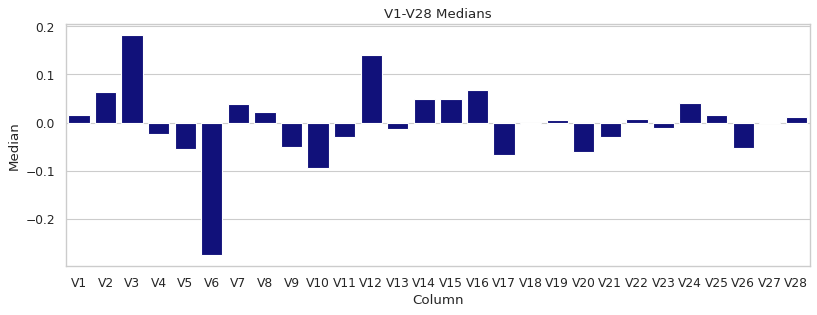

In [ ]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=X_train[pca_vars].median(), color='darkblue')
plt.xlabel('Column')
plt.ylabel('Median')
plt.title('V1-V28 Medians')
plt.show()


* The medians are also roughly zero.

* Next let's look at the **interquartile ranges (IQR)**.

* Pandas does not have a built-in IQR method, but we can use the [`quantile`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.quantile.html) method to calculate the IQR.

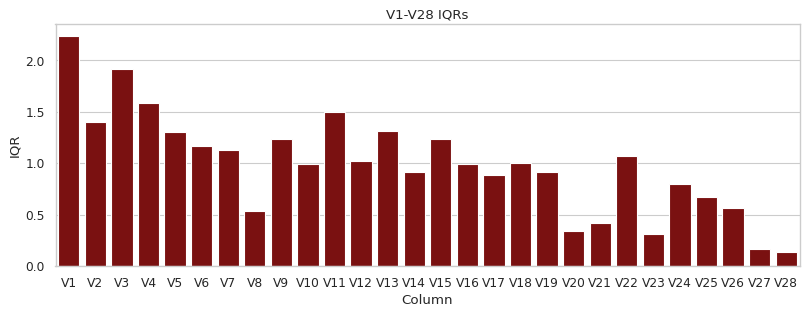

In [ ]:
plt.figure(figsize=(12,4), dpi=80)
sns.barplot(x=pca_vars, y=X_train[pca_vars].quantile(0.75) - X_train[pca_vars].quantile(0.25), color='darkred')
plt.xlabel('Column')
plt.ylabel('IQR')
plt.title('V1-V28 IQRs')
plt.show()


* The IQRs of `V1-V28` are on a similar scale as the standard deviations.

# Mutual Information between Fraud and the Predictors
* [Mutual information](https://en.wikipedia.org/wiki/Mutual_information) is a non-parametric method to estimate the mutual dependence between two variables.

* Mutual information of 0 indicates no dependence, and higher values indicate higher dependence.

* Mutual information methods can capture any kind of statistical dependency, but being nonparametric, they require **more samples for accurate estimation**.

* We have 227,845 training samples, so mutual information should work well.

* Because the target variable is discrete, we use [`mutual_info_classif`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif) (as opposed to [`mutual_info_regression`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#sklearn.feature_selection.mutual_info_regression) for a continuous target).

* `mutual_info_classif`: Estimated mutual information between each feature and the target.

  * discrete_features: False for dense and to True for sparse

  * n_neighbors: Higher values reduce variance of the estimation, but could introduce a bias.

  * copy: if copy==False, the initial data will be overwritten.

  * The seed of the pseudo random number generator for adding small noise to continuous variables in order to remove repeated values.


In [ ]:
from sklearn.feature_selection import mutual_info_classif

mutual_infos = pd.Series(data=mutual_info_classif(X_train, y_train, discrete_features=False,\
                                                  n_neighbors=3, copy=True, random_state=1), index=X_train.columns)


* The calculated mutual informations of each variable with `Class`, in descending order:
  * The five most correlated variables with `Class` are, in decreasing order, `V17`, `V14`, `V10`, `V12`, and `V11`.

In [ ]:
mutual_infos.sort_values(ascending=False)


V17       0.008234
V14       0.008159
V10       0.007526
V12       0.007441
V11       0.006753
V16       0.005972
V4        0.005104
V3        0.004779
V9        0.004198
V7        0.003975
V18       0.003966
V2        0.003157
V6        0.002467
V27       0.002440
V5        0.002403
V21       0.002371
V1        0.002056
V28       0.001897
V8        0.001874
Time      0.001657
Amount    0.001565
V19       0.001236
V20       0.001179
V23       0.000757
V24       0.000732
V25       0.000499
V26       0.000456
V13       0.000410
V22       0.000348
V15       0.000342
dtype: float64

# Modelling

* Now we're ready to build several machine learning models to predict whether a transaction is fraudulent.

* The class [`SGDClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) implements multiple linear classifiers with stochastic gradient descent (SGD) training, which makes learning much faster on large datasets.

* We'll implement the model as a machine learning pipeline that includes [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) for data standardization (rescaling each variable to zero mean and unit variance).

* The class [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) sequentially apply a list of transforms and a final estimator.
  * _transforms_: Intermediate steps of the pipeline must be implemented fit and transform methods. 
  * the _final estimator_ only needs to implement fit.
  * The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

pipeline_sgd = Pipeline([
    ('scaler', StandardScaler(copy=False)),
    ('model', SGDClassifier(max_iter=1000, tol=1e-3, random_state=1, warm_start=True))
])


* We'll conduct a grid search over several hyperparameter choices. The search uses 5-fold cross-validation with stratified folds. The type of linear classifier is chosen with the `loss` hyperparameter. For a **linear SVC** we set `loss = 'hinge'`, and for **logistic regression** we set `loss = 'log'`.

* Set the hyperparameter grids to search over, one grid for the linear SVC and one for logistic regression:


In [ ]:
param_grid_sgd = [{
    'model__loss': ['log'],
    'model__penalty': ['l1', 'l2'],
    'model__alpha': np.logspace(start=-3, stop=3, num=20)
}, {
    'model__loss': ['hinge'],
    'model__alpha': np.logspace(start=-3, stop=3, num=20),
    'model__class_weight': [None, 'balanced']
}]


* The grid search, implemented by [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), uses [`StratifiedKFold`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) with 5 folds for the train/validation splits. We'll use [`matthews_corrcoef`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html) (the [Matthews correlation coefficient](https://en.wikipedia.org/wiki/Matthews_correlation_coefficient), MCC) as our **scoring metric**.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, matthews_corrcoef

MCC_scorer = make_scorer(matthews_corrcoef)
grid_sgd = GridSearchCV(estimator=pipeline_sgd, param_grid=param_grid_sgd, \
                        scoring=MCC_scorer, n_jobs=-1, pre_dispatch='2*n_jobs', \
                        cv=5, verbose=1, return_train_score=False)


* Perform the grid search:

In [ ]:
grid_sgd.fit(X_train, y_train)


Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  4.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=False,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SGDClassifier(alpha=0.0001,
                                                      average=False,
                                                      class_weight=None,
                                                      early_stopping=False,
                                                      epsilon=0.1, eta0=0.0,
                                                      fit_intercept=True,
                                                      l1_ratio=0.15,
                                                      learning_rate='optimal',
                         

* Mean cross-validated MCC score of the best estimator found:

In [ ]:
grid_sgd.best_score_


0.8113192942181149

* MCC score---random guessing has a score of 0, and a perfect predictor has a score of 1. 

* Now check the best hyperparameters found in the grid search:


In [ ]:
grid_sgd.best_params_


{'model__alpha': 483.2930238571752,
 'model__class_weight': 'balanced',
 'model__loss': 'hinge'}